<a href="https://colab.research.google.com/github/adityap27/mnist-ann/blob/master/mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.) Data Preprocessing**

In [15]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [19]:
X_train.shape
y_train.shape

(60000,)

In [1]:
# Data Preprocessing
from keras.datasets import mnist
 
# Importing the dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#flatten the images
X_train=X_train.reshape((X_train.shape[0],784))
X_test=X_test.reshape((X_test.shape[0],784))
y_train=y_train.reshape((y_train.shape[0],1)) #fixing shape
y_test=y_test.reshape((y_test.shape[0],1)) #fixing shape

#Encoding of categorical data to one-hot format
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False)
y_train=onehotencoder.fit_transform(y_train)
y_test=onehotencoder.transform(y_test)

# Splitting the Training into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.175, random_state = 0)

#Feature Scaling
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

d:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **2.) Build and Train ANN**

In [2]:
#ANN

#import libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization

In [3]:
#Build ANN model
model=Sequential()
model.add(Dense(256,kernel_initializer='he_normal',input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax',kernel_initializer='glorot_normal'))

#Compiling model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


In [7]:
#Training model
history=model.fit(X_train,y_train,epochs=10,batch_size=512,validation_data=(X_val,y_val),verbose=1,use_multiprocessing=True)

Epoch 1/10
97/97 [==============================] - 1s 10ms/step - loss: 0.0261 - accuracy: 0.9912 - val_loss: 0.0684 - val_accuracy: 0.9835
Epoch 2/10
97/97 [==============================] - 1s 8ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.0625 - val_accuracy: 0.9838
Epoch 3/10
97/97 [==============================] - 1s 9ms/step - loss: 0.0251 - accuracy: 0.9912 - val_loss: 0.0675 - val_accuracy: 0.9831
Epoch 4/10
97/97 [==============================] - 1s 8ms/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.0682 - val_accuracy: 0.9831
Epoch 5/10
97/97 [==============================] - 1s 9ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0730 - val_accuracy: 0.9825
Epoch 6/10
97/97 [==============================] - 1s 10ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 0.0681 - val_accuracy: 0.9840
Epoch 7/10
97/97 [==============================] - 1s 9ms/step - loss: 0.0261 - accuracy: 0.9910 - val_loss: 0.0721 - val_accuracy: 0.9820
Epoch 8/10
97/97 [

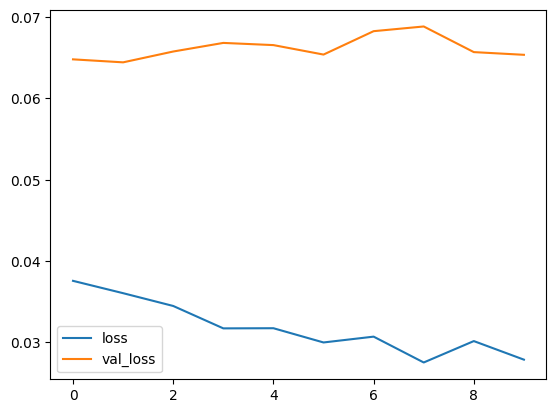

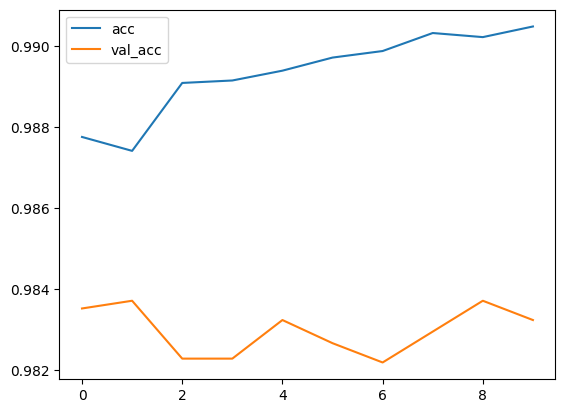

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [ ]:
train=model.evaluate(X_train,y_train)
print(train)

49500/49500 [==============================] - 4s 86us/step
[0.00023556755931090402, 1.0]


In [ ]:
val=model.evaluate(X_val,y_val)
print(val)

10500/10500 [==============================] - 1s 87us/step
[0.07706455891983031, 0.9842857122421265]


In [ ]:
print(100*(1-train[1]))
print(100*(train[1]-val[1]))#After tuning.....the measure of "variance" wasn't reducing after...~~ 1.5%

0.0
1.5714287757873535


In [ ]:
model.save('mnist-ann.model')

# **3.) Evaluation on Test set**

In [ ]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 85us/step


[0.08582737032464338, 0.9842000007629395]